In [51]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("TSP Matrix.csv", header=None)

In [53]:
df.columns = ['x', 'y']

In [54]:
df.head()

,x,y
0,2.7933,3.6940
1,2.6067,4.4254
2,2.8600,5.0373
3,2.5400,6.2463
4,3.1267,6.4701


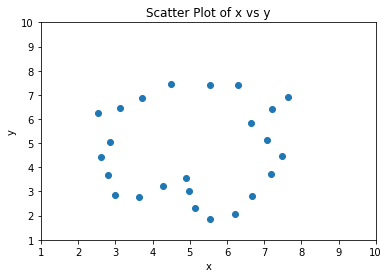

In [55]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.title('Scatter Plot of x vs y')
plt.show()

In [56]:
# To calculate the distance between each city
def calculate_distance_matrix(df):
    num_cities = len(df)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            x1, y1 = df.iloc[i]
            x2, y2 = df.iloc[j]
            distance_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance_matrix

# To run the class to make a matrix
distance_matrix = calculate_distance_matrix(df)

# To display the matrix.
distance_matrix_df = pd.DataFrame(distance_matrix)
distance_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.754828,1.344955,2.564838,2.796048,3.327688,4.111249,4.641222,5.098828,5.815422,...,4.386726,3.988462,3.787718,3.295457,2.722923,2.279243,2.098710,1.550642,1.260858,0.873894
1,0.754828,0.000000,0.662256,1.822121,2.109786,2.705419,3.553030,4.205051,4.739405,5.610638,...,4.629071,4.381416,4.311853,3.888250,3.294177,2.753187,2.444147,2.050227,1.961756,1.628650
2,1.344955,0.662256,0.000000,1.250632,1.457410,2.043680,2.901820,3.599568,4.170696,5.130404,...,4.519600,4.418469,4.484554,4.146633,3.543632,2.925453,2.516956,2.293262,2.410979,2.198046
3,2.564838,1.822121,1.250632,0.000000,0.627936,1.349135,2.283698,3.235777,3.931699,5.137388,...,5.288430,5.373747,5.570921,5.303289,4.703334,4.047060,3.578422,3.477723,3.659721,3.433058
4,2.796048,2.109786,1.457410,0.627936,0.000000,0.731248,1.670595,2.607870,3.305480,4.528793,...,4.904377,5.092699,5.385559,5.191958,4.604296,3.921122,3.413939,3.435770,3.750770,3.629253


# 1. Simulated Annealing Algorithm with Adjacent swapping

In [76]:
# Parameters
Tmax = 10.0
Tmin = 0.0005
alpha = 0.995
num_runs = 10
r = random.uniform(0.5, 0.99)

In [77]:
# Function to calculate the total distance of the tour (solution)
def calculate_cost(solution, distance_matrix):
    total_cost = 0
    num_cities = len(solution)
    for i in range(num_cities - 1):
        total_cost += distance_matrix[solution[i]][solution[i+1]]
    total_cost += distance_matrix[solution[-1]][solution[0]]  # Return to the start city
    return total_cost

In [78]:
# Function to generate a neighboring solution by swapping two cities
def generate_neighbor(solution):
    new_solution = solution.copy()
    i, j = random.sample(range(len(solution)), 2)
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

In [79]:
# Simulated Annealing Algorithm
def simulated_annealing(distance_matrix, Tmax, Tmin, alpha):
    num_cities = len(distance_matrix)
    
    # Step 1: Generate an initial solution (random permutation of cities)
    current_solution = list(np.random.permutation(num_cities))
    current_cost = calculate_cost(current_solution, distance_matrix)
    costs = [current_cost]  # To store the cost over iterations
    
    best_solution = current_solution.copy()
    best_cost = current_cost
    costs = [current_cost]  # To store the cost over iterations

    T = Tmax  # Initial temperature
    iteration = 0  # Track the iteration count
    best_iteration = 0  # To track when the best solution is found

    while T > Tmin:
        for _ in range(100):  # Loop until the stopping criterion at each temperature (100 iterations in this case)
            iteration += 1
            # Step 2: Generate a neighboring solution
            neighbor_solution = generate_neighbor(current_solution)
            neighbor_cost = calculate_cost(neighbor_solution, distance_matrix)
            
            # Step 3: Calculate the cost difference
            delta_E = neighbor_cost - current_cost

            # Step 4: Accept new solution if it improves or based on probability
            if delta_E <= 0 or r < math.exp(-delta_E / T):
                current_solution = neighbor_solution
                current_cost = neighbor_cost

                # Update the best solution found so far
                if current_cost < best_cost:
                    best_solution = current_solution.copy()
                    best_cost = current_cost
                    best_iteration = iteration  # Record the iteration when the best solution was found
                    
            # Record the current cost
            costs.append(current_cost)

        # Step 5: Decrease the temperature according to the cooling schedule
        T *= alpha

    return best_solution, best_cost, costs, best_iteration

In [80]:
# Store all results for plotting
all_costs = []
all_best_iterations = []  # To store best iteration for each run

Acceptance rate is 0.7917525316727284
Run 1: Best cost (total distance): 19.555012927378097, Found at iteration: 22751
Run 2: Best cost (total distance): 19.555012927378097, Found at iteration: 20262
Run 3: Best cost (total distance): 19.555012927378094, Found at iteration: 23732
Run 4: Best cost (total distance): 19.555012927378094, Found at iteration: 23094
Run 5: Best cost (total distance): 19.555012927378097, Found at iteration: 20019
Run 6: Best cost (total distance): 19.555012927378094, Found at iteration: 24290
Run 7: Best cost (total distance): 19.555012927378094, Found at iteration: 23738
Run 8: Best cost (total distance): 19.555012927378094, Found at iteration: 23128
Run 9: Best cost (total distance): 19.555012927378094, Found at iteration: 21099
Run 10: Best cost (total distance): 19.555012927378097, Found at iteration: 21320


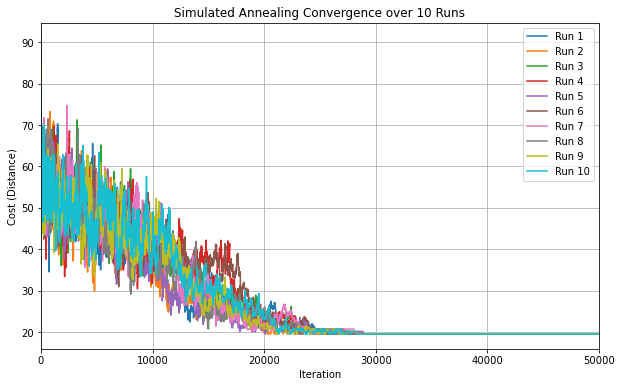

In [81]:
# Print r (acceptance rate)
print(f"・Maximum temperature is {Tmax}")
print(f"・Minimum temperature is {Tmin}")
print(f"・Alpha is {alpha}")
print(f"・Acceptance rate of the bad solution is {r}")

# Run Simulated Annealing 10 times
for run in range(num_runs):
    best_solution, best_cost, costs, best_iteration = simulated_annealing(distance_matrix, Tmax, Tmin, alpha)
    all_costs.append(costs)
    all_best_iterations.append(best_iteration)
    print(f"Run {run+1}: Best cost (total distance): {best_cost}, Found at iteration: {best_iteration}")

# Plot the results
plt.figure(figsize=(10, 6))
for i, costs in enumerate(all_costs):
    plt.plot(costs, label=f'Run {i+1}')

    
plt.xlabel('Iteration')
plt.ylabel('Cost (Distance)')
plt.xlim(0, 50000)
plt.title('Simulated Annealing Convergence over 10 Runs')
plt.legend()
plt.grid(True)
plt.show()


# 2. Simulated Annealing Algorithm with Inversion Operation

In [82]:
# Parameters
Tmax2 = 10.0
Tmin2 = 0.0005
alpha2 = 0.995
num_runs2 = 10
r2 = random.uniform(0.5, 0.99)